# TKT4108 Structural Dynamics 2

## Solution exercise 4

**Main topics:** Monte Carlo simulation of time series, auto and cross-correlation, auto and cross-spectral density

**References:** Newland Chapter 4-5




### Problem 1: Fourier series

**a)**

We start by plotting the function $f(t)=5(t-t^{10})$.


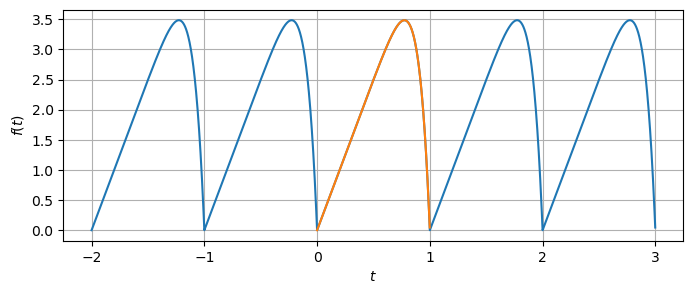

In [35]:
import numpy as np
from matplotlib import pyplot as plt

T=1 # Length of period
t = np.arange(0,1,0.001) # x-axis
f =5.0*(t-t**10)  # Function value

t_rep=np.hstack((t-2*T,t-T, t, t+T,t+2*T)) # Repeated five periods
f_rep=np.hstack((f,f,f,f,f)) # Repeated five periods

# Plot waveform
plt.figure(figsize=(8, 3))
plt.plot(t_rep,f_rep) # Plot five periods
plt.plot(t,f) # Plot one period
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.grid()



The Fourier series is defined as:

$$ x(t) = a_{0} + \sum_{k=1}^{\infty} \left( a_k \cos\left(\frac{2\pi k}{T}t \right) + b_k \sin\left(\frac{2\pi k}{T}t \right)\right)  $$

Here $a_0$, $a_k$, and $b_k$ are Fourier coefficients given by:

$$a_0 = \frac{1}{T} \int_{0}^{T}x(t) \:\text{d}t$$

$$a_k = \frac{1}{T} \int_{0}^{T}x(t)\cos\left(\frac{2\pi k}{T}t \right)\:\text{d}t$$

$$b_k = \frac{1}{T} \int_{0}^{T}x(t)\sin\left(\frac{2\pi k}{T}t \right)\:\text{d}t$$

We calculate the coefficients by numerical integration for up to 8 terms:

a0 is 2.045427990993403


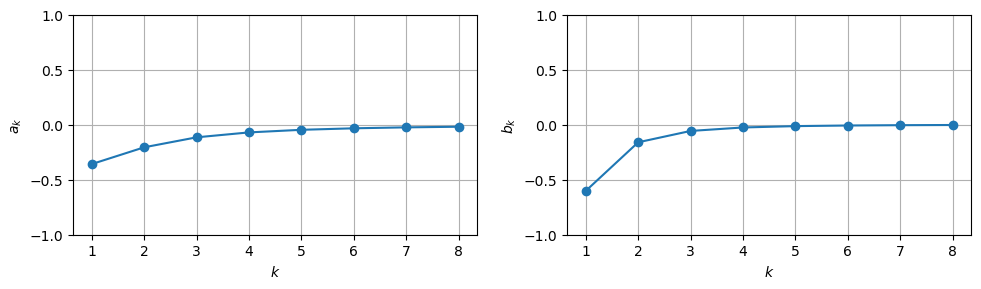

In [36]:
nterms = 8 # Number of Fourier coefficients in the sum

a0 = 1/T*np.trapezoid(f,t) # Mean value
ak = np.zeros((nterms)) 
bk = np.zeros((nterms))

k_axis=np.arange(1,nterms+1,1) # 1,2,3...,nterms

for idx, k in np.ndenumerate(k_axis):
    ak[idx] = 1/T*np.trapezoid(f*np.cos(2.0*np.pi*k*t/T),t)
    bk[idx] = 1/T*np.trapezoid(f*np.sin(2.0*np.pi*k*t/T),t)

f_axis=k_axis/T # Corresponding frequencies in Hz for each term

# Plot Fourier coeffecients
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(np.arange(1,nterms+1),ak,marker='o')
plt.ylim(-1, 1)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$a_k$')

plt.subplot(1, 2, 2)
plt.plot(np.arange(1,nterms+1),bk,marker='o')
plt.ylim(-1, 1)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$b_k$')

plt.tight_layout()

print('a0 is ' + str(a0))

$a_0 \approx 2.04$, which is the mean value of $f(t)$.

Both for the cosine terms ($a_k$) and the sine terms ($b_k$), the first few coefficients contribute the most; higher terms are very small. This indicates we only need a few terms to approximate the function well with a Fourier series. We can confirm with a plot.


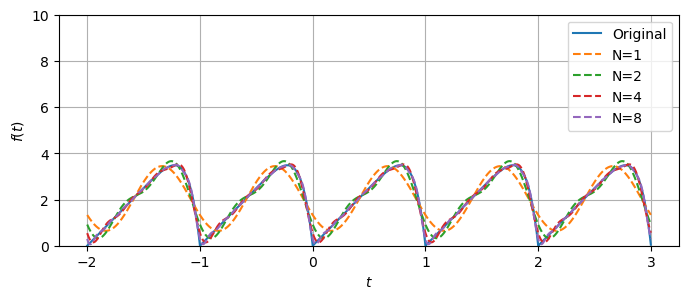

In [37]:
# Plot Fourier series approximation

f_Fourier = np.zeros((nterms,t_rep.shape[0]))

# Save each term up to 8
for idx, k in np.ndenumerate(k_axis):
    f_Fourier[k-1,:] = 2.0*(ak[idx]*np.cos(2.0*np.pi*k*t_rep/T) + bk[idx]*np.sin(2.0*np.pi*k*t_rep/T))

plt.figure(figsize=(8, 3))
plt.plot(t_rep,f_rep, label='Original') # Plot five periods

N_plot=[1,2,4,8]

for N in N_plot:

    f_Fourier_plot=np.ones(t_rep.shape[0])*a0+np.sum(f_Fourier[0:N,:],axis=0) # Plot Fourier approximation
    plt.plot(t_rep,f_Fourier_plot,'--',label=('N='+str(N)))

plt.ylim(0, 10)
#plt.xlim(0,5)
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.legend()

We confirm that even using $N=2$ or $N=4$ terms is a good approximation, but higher orders yields slight more accuracy.

**b**)

It can be observed from $a_k$ and $b_k$ that this function contains more low-frequent than high-frequent components. It will therefore lead to a greater response for a 1 Hz system compared to the 10 Hz one.


### Problem 3: Technical terms

**a)**

- *Two-sided auto spectral density*: describes the energy (variance) distribution across both positive and negative frequencies $(-\infty < \omega < \infty $). It is symmetric around zero: $S_{x}(\omega) = S_{x}(-\omega)$.

- *One-sided auto spectral density*: since the spectrum is symmetric, we can shift all energy to positive frequencies. We then have to double it:
$   S_{x}^{+}(\omega) = 2 S_{x}(\omega) \quad (0 < \omega < \infty )$


**b)**

- *Auto spectral density*: symmetric, real, and non-negative since it represents the energy at each frequency.

- *Cross-spectral density*: can be complex. Can be positive and negative. The real part is symmetric and the imaginary part is antisymmetric. This can expressed as: $ S_{x_1 x_2}(\omega) = \overline{S_{x_1 x_2}}(-\omega)  $.


**c)**

Why must the imaginary part be anti-symmetric? Firstly, the covariance can be calculated from the area of the cross-spectrum:

$$ \text{Cov}(x_1,x_2) = 
\int_{-\infty}^{\infty} 
S_{x_1 x_2}(\omega) \: \text{d} \omega
$$

The covariance is always a real number, so the imaginary part must cancel out in the integration over negative and positive frequencies. The anti-symmetric property of the imaginary part ensures this cancellation will take place.

We can also consider more in a more in-depth view of the cross-correlation:

$$
R_{x_1 x_2}(\tau)=
\int_{-\infty}^{\infty}
S_{x_1 x_2}(\omega) \exp({i \omega \tau}) \: \text{d} \omega
=
\int_{-\infty}^{\infty}
S_{x_1 x_2}(\omega) \big( \cos(\omega\tau)+i \sin(\omega\tau) \big) \: \text{d} \omega
$$

We can split this integral into four different contributing terms:

- $\Re( S_{x_1 x_2}(\omega)) \cos(\omega\tau) = \text{Even} \times \text{Even} = \text{Even} = \text{Non-zero integral} $
- $\Re( S_{x_1 x_2}(\omega)) \: i \: \sin(\omega\tau) = i \times \text{Even} \times \text{Odd} = i \times \text{Odd} = i \times \text{Zero integral} $
- $i \: \Im( S_{x_1 x_2}(\omega)) \cos(\omega\tau) = i \times \text{Odd} \times \text{Even} = i \times \text{Odd} = i \times \text{Zero integral} $
- $i \: \Im( S_{x_1 x_2}(\omega)) \: i\:  \sin(\omega\tau) = i^2 \times \text{Odd} \times \text{Odd} = - \text{Even} = \text{Non-zero integral} $

The real part of $S$ is symmetric (even), the imaginary part is anti-symmetric (odd). Cosine is an even function, while sine is odd. 

The integral of an even function (from $-\infty$ to $\infty$) will be a non-zero number, while for an odd function it will always be zero.

We see that all imaginary components of the integral will be zero. This is naturally required since $R_{x_1 x_2}(\tau)$ is purely real.


### Problem 4: Relation between auto correlation and spectral density

**a)**

We have $ R(\tau)= \sigma^2 \exp( - \dfrac{\tau^2}{2 L^2}) $. The spectral density is the Fourier transform:

$$
S(\omega)=
\dfrac{1}{2 \pi}
\int_{-\infty}^{\infty}
R(\tau) \exp({-i \omega \tau}) \: \text{d} \tau
$$

This integral has an analytical solution. We can look up the Fourier transform of $e^{-x^2}$ in tables, or ask a machine learning language model for the answer to the integral:

$$
S(\omega)=
\frac{\sigma^2}{\sqrt{2\pi} } L \exp\left( -\frac{1}{2} \omega^2 L^2 \right)
$$


**b)**

We have $S(\omega)= \dfrac{\sigma^2 \cdot 2a}{2\pi} \cdot \dfrac{1}{a^2+\omega^2}  $. The auto-correlation density is the inverse Fourier transform:

$$
R(\tau)=
\int_{-\infty}^{\infty}
S(\omega) \exp({i \omega \tau}) \: \text{d} \omega
$$

This integral has an analytical solution. We can look up the inverse Fourier transform of $\dfrac{1}{a^2+x^2}$ in tables, or ask a machine learning language model for the answer to the integral:

$$
R(\tau)=
\sigma^2 \exp \left( -a | \tau | \right)
$$


**c)**


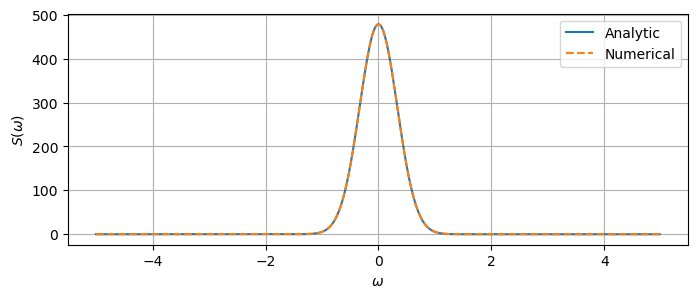

In [38]:
# Parameters
sigma=20.0
L=3.0

tau = np.arange(-15,15,0.01) # Time vector
R = sigma**2*np.exp(-0.5*tau**2/L**2) # Auto correlation

omega = np.arange(-5,5,0.02) # Frequency vector
S=sigma**2/np.sqrt(2*np.pi)*L*np.exp(-0.5*omega**2*L**2) # Analytical spectrum

# Integrate over tau for each omega
S_num = np.zeros(omega.shape[0],dtype=complex) 
for k in range(omega.shape[0]):
    S_num[k] = 1/(2*np.pi)*np.trapezoid(R*np.exp(-1j*omega[k]*tau),tau) # Spectrum by numerical integration

S_num=np.real(S_num) # Remove false imaginary components

# Compare in a plot
plt.figure(figsize=(8, 3))
plt.plot(omega,np.real(S),label='Analytic')
plt.plot(omega,np.real(S_num),'--',label='Numerical')
plt.grid()
plt.ylabel(r'$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.legend()

We can calculate the variance using two methods: $\sigma^2=R(\tau=0)$ and  $\sigma^2=\int_{-\infty}^{\infty} S(\omega)  \: \text{d} \omega $. If implementations are correct, these should be equal.


In [39]:
sd_num=np.trapezoid(S_num,omega)**0.5
sd_ana=np.trapezoid(S,omega)**0.5

print('SD from ACF is ' + str(sigma))
print('SD from PSD (numerical) is ' + str(sd_num))
print('SD from PSD (analytic) is ' + str(sd_ana))


SD from ACF is 20.0
SD from PSD (numerical) is 19.999999817795317
SD from PSD (analytic) is 20.0



**d)**

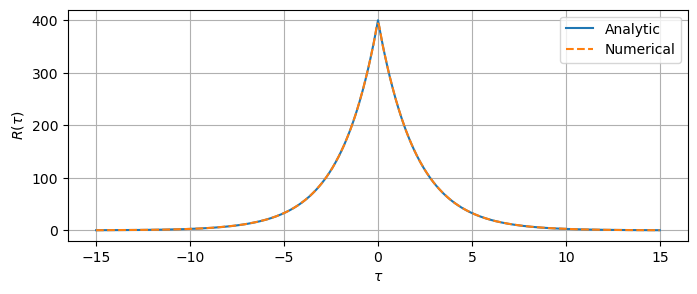

In [40]:
# Parameters
sigma=20.0
a=0.5

tau = np.arange(-15,15,0.01) # Time vector

omega = np.arange(-20,20,0.01) # Frequency vector
S = sigma**2*2*a/(2*np.pi)*1/(a**2+omega**2) # Spectral density

R=sigma**2*np.exp(-a*np.abs(tau)) # Analytical auto correlation

# Integrate over omega for each tau
R_num = np.zeros(tau.shape[0],dtype=complex)
for k in range(tau.shape[0]):
    R_num[k] = np.trapezoid(S*np.exp(1j*omega*tau[k]),omega) # Auto correlation by numerical integration

R_num=np.real(R_num) # Remove false imaginary components

# Compare in a plot
plt.figure(figsize=(8, 3))
plt.plot(tau,np.real(R),label='Analytic')
plt.plot(tau,np.real(R_num),'--',label='Numerical')
plt.grid()
plt.ylabel(r'$R(\tau)$')
plt.xlabel(r'$\tau$')
plt.legend()

We compare the standard deviation in a similar manner.

In [41]:
sd_num=np.trapezoid(S,omega)**0.5

print('SD from ACF is ' + str(np.max(R)**0.5))
print('SD from PSD is ' + str(sd_num))

SD from ACF is 19.9999999999984
SD from PSD is 19.84020001045208


### Problem 4: Simulation of stochastic time series


**a)**

The frequency spacing will be $\Delta \omega=\dfrac{2 \pi}{T}=3.49\cdot 10^{-3}$.


domega is 0.003490658503988659


C:\Users\oyvinpet\AppData\Local\Temp\ipykernel_24672\575607276.py:26: RuntimeWarning: invalid value encountered in divide
  S=(I*U)**2*A*omegaz/(omega*(1+1.5*A*omegaz)**(5/3))


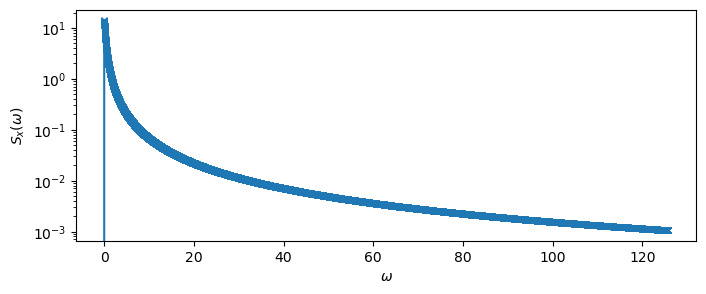

In [42]:
import numpy as np
from matplotlib import pyplot as plt
import time

T=1800
dt=0.05

N=int(T/dt)

t=np.arange(0,N,1)*dt # Time axis

domega=2*np.pi/T # Frequency spacing
print('domega is ' + str(domega))

omega = np.arange(0,N,1)*domega # Frequency axis

# Parameters
A=10.0
I=0.1
z=30.0
U=30.0

omegaz=omega*z/(2*np.pi*U)

# Define spectrum
S=(I*U)**2*A*omegaz/(omega*(1+1.5*A*omegaz)**(5/3))
S[0]=0

# Plot spectrum
plt.figure(figsize=(8,3))
plt.plot(omega,S,marker='x',markersize=5)
plt.ylabel(r'$S_x(\omega)$')
plt.xlabel(r'$\omega$')
plt.yscale('log')

The cosine-sum method is as follows:

$$x(t) = \sum_{k=0}^{N-1}  A_k \cos (\omega_kt + \phi_k) $$

$$A_k = \sqrt{2 S_x(\omega_k) \Delta \omega} $$

Here, $S_x(\omega_k)$ is the auto-spectral density of the process, and $\phi_k$ is random phase angles evenly distributed between $0$ and $2\pi$.

Spent time = 30221.554040908813 ms


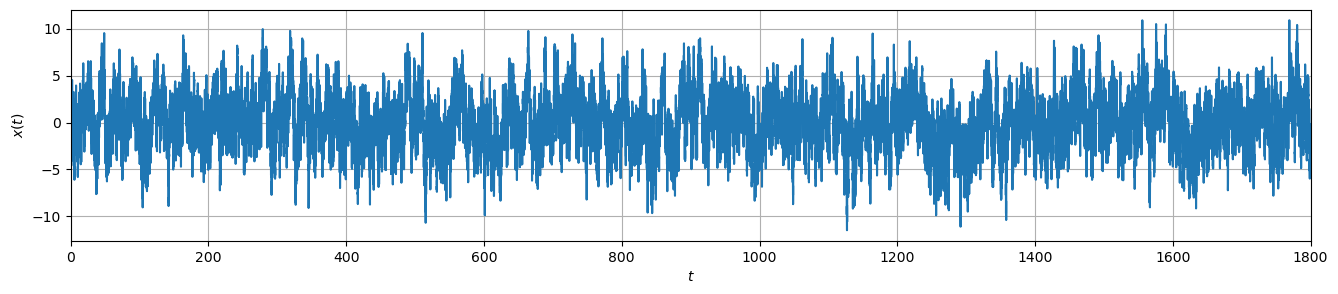

In [43]:
phi = np.random.rand(N)*2*np.pi # Random phase angles 

x = np.zeros_like(t) # Initialize the vector of x values

t0=time.time()
for k in range(N):
    Ak = (2*S[k]*domega)**0.5 #Amplitude
    x = x + Ak * np.cos(omega[k]*t+phi[k]) # Sum the contribution from each harmonic component
t1=time.time()

print('Spent time = ' + str((t1-t0)*1000) + ' ms')

# Plot wind turbulence
plt.figure(figsize=(16,3))
plt.plot(t,x)
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.xlim(0,T)
plt.grid()


The variance is calculated in the time domain from the time series and in the frequency domain as $\sigma^2=\int_{-\infty}^{\infty} S(\omega) \: \text{d}\omega$. These should give the same result.

In [44]:
sd_td=np.std(x) # SD from time series 
sd_fd=np.trapezoid(S,omega)**0.5 # SD from spectrum

print('Time domain standard deviation is ' + str(sd_td))
print('Frequency domain standard deviation is ' + str(sd_fd))


Time domain standard deviation is 2.9618983071161296
Frequency domain standard deviation is 2.96220683590699


**c)**

We start by attempting to double the length of the time vector: $ t \in [0,\: 2 T]$, and repeat the simulation by the cosine sum method.

In [ ]:
t_double=np.arange(0,2*N,1)*dt # Time axis (double length)

x_double = np.zeros_like(t_double) # Initialize the vector of x values

for k in range(N):
    Ak = (2*S[k]*domega)**0.5 #Amplitude
    x_double = x_double + Ak * np.cos(omega[k]*t_double+phi[k]) # Sum the contribution from each harmonic component

plt.figure(figsize=(16,3))
plt.plot(t,x,label='Original')
plt.plot(t_double,x_double,'--',label='Extended time vector')
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.xlim(0,2*T)
plt.legend()
plt.grid()

Upon closer inspection, we observe that the time series from 1800–3600 s (i.e., $T$ to $2T$) is an exact replica of the time series from 0–1800 s ($0$ to $T$). This repetition is a fundamental property of the Fourier series, where we implicitly assume that the time series is periodic with a period $T$. By doubling the length of the time vector without adjusting $\Delta \omega$, the time series simply repeats.

The first cosine wave component, $A_1 \cos (\Delta \omega t)$, will determine the feasible length of the simulation since $\Delta \omega $ is the lowest frequency (the one that takes the longest time to complete one cycle). This argument is the basis for the relationship $T = \dfrac{2 \pi}{\Delta \omega}$.

Doubling the time vector in this way is problematic because it introduces a non-zero auto correlation between the values at times $t$ and $t + T$. As a result, the extended time series no longer has the correct statistical properties, which will affect the statistical results of the calculated dynamic response. You can imagine if this time series was applied as a load to a structure: the response time history would also be repeated twice. The simulated response would not see any "new" data beyond 1800 s. 

This problem can, however, be solved by simply halving $\Delta \omega$ such that the time vector indeed becomes 1 hour long.


**d)**

The IFFT method is defined as:

$$x(t) = \Re \left(\text{IFFT} \left( A_k e^{i \phi_k} \right) \right)$$


In [ ]:
#phi = np.random.rand(N)*2*np.pi # Random phase angles 

t_ifft = np.arange(0,N,1)*dt # Time axis

t0=time.time()
c = (2*S*domega)**0.5*np.exp(1j*phi) # The complex amplitude including the phase angle
x_ifft = np.real(np.fft.ifft(c)*N) # The IFFT
t1=time.time()

print('Spent time = ' + str((t1-t0)*1000) + ' ms')

plt.figure(figsize=(16,3))
plt.plot(t,x,label= 'cos method')
plt.plot(t_ifft,x_ifft,label = 'IFFT method',linestyle=':')
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.xlim(0,T)
plt.grid()
plt.legend()

The results are identical to those obtained using the cosine-sum method (when the same "random" phase angles are used). 

However, the IFFT method is significantly faster: approximately 5 ms compared to 15000 ms. This substantial improvement is due to the inherent efficiency of the IFFT algorithm, which reduces computational complexity from $\mathcal{O}(N^2)$ in the cosine-sum approach to $\mathcal{O}(N \log N)$ for the IFFT. For long time series (large $N$), this is substatial.

Additionally, the way these algorithms are implemented in Python further contributes to the speedup.